In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/New_Datasets/IMDB Dataset.csv',nrows=15000)
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
14995,Bobcat Goldthwait should be commended for atte...,negative
14996,"And it's not because since her days on ""Claris...",positive
14997,A traveling couple (Horton and Hamilton)stumbl...,negative
14998,This film is deeply disappointing. Not only th...,negative


In [ ]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

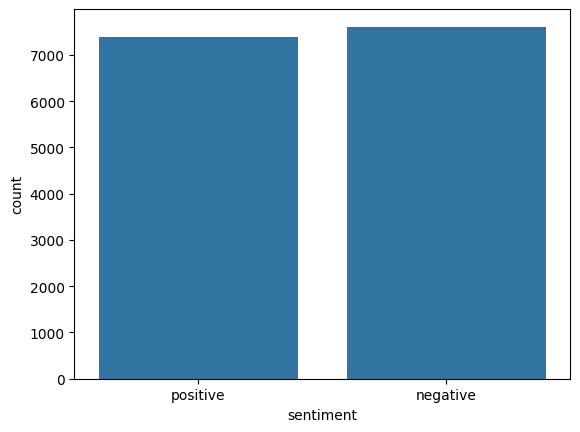

In [ ]:
import seaborn as sns
sns.countplot(x='sentiment',data=df)

In [ ]:
df['sentiment'].value_counts()

sentiment
negative    7609
positive    7391
Name: count, dtype: int64

In [ ]:
df['sentiment']=df['sentiment'].map({'positive':1,'negative':0})
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
14995,Bobcat Goldthwait should be commended for atte...,0
14996,"And it's not because since her days on ""Claris...",1
14997,A traveling couple (Horton and Hamilton)stumbl...,0
14998,This film is deeply disappointing. Not only th...,0


In [ ]:
reviews=df.review
reviews

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
14995    Bobcat Goldthwait should be commended for atte...
14996    And it's not because since her days on "Claris...
14997    A traveling couple (Horton and Hamilton)stumbl...
14998    This film is deeply disappointing. Not only th...
14999    The revelation here is Lana Turner's dancing a...
Name: review, Length: 15000, dtype: object

In [ ]:
#Remove special characters
reviews=reviews.str.replace("[^a-zA-Z0-9 ]+","")
reviews

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
14995    Bobcat Goldthwait should be commended for atte...
14996    And it's not because since her days on "Claris...
14997    A traveling couple (Horton and Hamilton)stumbl...
14998    This film is deeply disappointing. Not only th...
14999    The revelation here is Lana Turner's dancing a...
Name: review, Length: 15000, dtype: object

In [ ]:
#Stemming
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
from nltk import TweetTokenizer
tk=TweetTokenizer()

In [ ]:
reviews=reviews.apply(lambda line:[stemmer.stem(token.lower()) for token in tk.tokenize(line)]).apply(lambda token:" ".join(token))
reviews

0        one of the other review has mention that after...
1        a wonder littl product . < br / > < br / > the...
2        i thought this was a wonder way to spend time ...
3        basic there a famili where a littl boy ( jake ...
4        petter mattei " love in the time of money " is...
                               ...                        
14995    bobcat goldthwait should be commend for attemp...
14996    and it not becaus sinc her day on " clarissa e...
14997    a travel coupl ( horton and hamilton ) stumbl ...
14998    this film is deepli disappoint . not onli that...
14999    the revel here is lana turner danc abil . thou...
Name: review, Length: 15000, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
vect=vectorizer.fit_transform(reviews)
print(vect)

  (0, 35395)	0.04474802808527059
  (0, 9950)	0.07361016498650773
  (0, 43946)	0.030673550710203584
  (0, 39717)	0.04598986349263967
  (0, 6447)	0.021923540340842068
  (0, 19090)	0.020865832816247355
  (0, 42008)	0.04073543454311612
  (0, 40715)	0.06860867749719243
  (0, 8357)	0.06318042831774885
  (0, 4012)	0.037197079114194
  (0, 24503)	0.03612268751503317
  (0, 13408)	0.04366965960308852
  (0, 35706)	0.05652945119111631
  (0, 37415)	0.051540253119746096
  (0, 21980)	0.04153498318176949
  (0, 39007)	0.025746906322845677
  (0, 4635)	0.07547356685897874
  (0, 19857)	0.026462267632093833
  (0, 40313)	0.03449705900040723
  (0, 7894)	0.049528008905171436
  (0, 25208)	0.05130098982270241
  (0, 24044)	0.05564441940873425
  (0, 42785)	0.02464969157603405
  (0, 15845)	0.045368232117298735
  (0, 28083)	0.047611031530333706
  :	:
  (14999, 36143)	0.01730344618714181
  (14999, 1717)	0.016348434162157015
  (14999, 2039)	0.06765613749312434
  (14999, 27928)	0.057375785883652296
  (14999, 16065)	0.0

In [ ]:
vect.shape

(15000, 44305)

In [ ]:
y=df['sentiment']
y

0        1
1        1
2        1
3        0
4        1
        ..
14995    0
14996    1
14997    0
14998    0
14999    1
Name: sentiment, Length: 15000, dtype: int64

In [ ]:
y.shape

(15000,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(vect,y,test_size=0.3,random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
knn=KNeighborsClassifier(n_neighbors=5)
sv=SVC(kernel='linear')
nbs=GaussianNB()
dt=DecisionTreeClassifier(criterion='entropy',max_depth=7,random_state=1)
rf=RandomForestClassifier(n_estimators=300,criterion='entropy',max_depth=7,random_state=1)
ad=AdaBoostClassifier()
xgb=XGBClassifier()
models=[knn,sv,dt,rf,ad,xgb]
for model in models:
  print(model)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))

KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      2280
           1       0.75      0.69      0.72      2220

    accuracy                           0.73      4500
   macro avg       0.73      0.73      0.73      4500
weighted avg       0.73      0.73      0.73      4500

SVC(kernel='linear')
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      2280
           1       0.88      0.88      0.88      2220

    accuracy                           0.88      4500
   macro avg       0.88      0.88      0.88      4500
weighted avg       0.88      0.88      0.88      4500

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=1)
              precision    recall  f1-score   support

           0       0.82      0.59      0.69      2280
           1       0.68      0.86      0.76      2220

    accuracy                           0.73      4500
   macro av

In [ ]:
y_new=sv.predict(vectorizer.transform(["Phil the Alien is one of those quirky films where the humour is based around the oddness of everything rather than actual punchlines.<br /><br />At first it was very odd and pretty funny but as the movie progressed I didn't find the jokes or oddness funny anymore.<br /><br />Its a low budget film (thats never a problem in itself), there were some pretty interesting characters, but eventually I just lost interest.<br /><br />I imagine this film would appeal to a stoner who is currently partaking.<br /><br />For something similar but better try 'Brother from another planet'"]))
if y_new.item()==0:
  print("Negative")
else:
  print("Positive")


Negative


In [ ]:
import pickle
pickle.dump(sv,open('model_sv.sav','wb'))

In [ ]:
pickle.dump(vectorizer,open('vectorizer.sav','wb'))